# Evaluating performance of scalable GPLVM models for dimensionality reduction of single-cell genomics datasets
---

In [1]:
from Function import plot_cormap, scatter_Plot,CorrelationScores_PT,randScore, NMI_Scores, plot_umap
import scanpy as sc
import os, torch
import numpy as np
import pandas as pd
import pickle as pkl
import scipy.sparse as sp
from collections import namedtuple
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import sklearn.metrics

In [2]:
## Load output of trained GPLVMs (14 in total)

In [9]:
# gastrulation =sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/gastrulation_unscaled.h5ad')
# forebrain= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/forebrain_unscaled.h5ad')
# bonemarrow= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/bonemarrow_unscaled.h5ad')
# iPSC= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/iPSC_unscaled.h5ad')
# pancreas= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/pancreas_unscaled.h5ad')
# pbmc10k= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/pbmc10k_unscaled.h5ad')
# pbmc3k= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/pbmc3k_unscaled.h5ad')

In [2]:
gastrulation=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/gastrulation_pca.h5ad')
gastrulation_random=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/gastrulation_random.h5ad')
forebrain=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/forebrain_pca.h5ad')
forebrain_random=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/forebrain_random.h5ad')
bonemarrow=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/bonemarrow_pca.h5ad')
bonemarrow_random=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/bonemarrow_random.h5ad')
iPSC=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/iPSC_pca.h5ad')
iPSC_random=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/iPSC_random.h5ad')
pancreas=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/pancreas_pca.h5ad')
pancreas_random=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/pancreas_random.h5ad')
pbmc10k=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/pbmc10k_pca.h5ad')
pbmc10k_random=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/pbmc10k_random.h5ad')
pbmc3k=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/pbmc3k_pca.h5ad')
pbmc3k_random=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/Unscaled/pbmc3k_random.h5ad')

| Dataset     | Gastrulation|
| ----------- | ----------- |
| No of Cells | 89267        |
| No of Genes | 1488       |
|Time         | 9 minutes       |

| Dataset     | Forebrain|
| ----------- | ----------- |
| No of Cells | 1720       |
| No of Genes | 2454     |
|Time         | ~13 minutes       |

| Dataset     | Bonemarrow|
| ----------- | ----------- |
| No of Cells | 5780        |
| No of Genes |  2030|    |
|Time         |~12 mins        |

| Dataset     |iPSC|
| ----------- | ----------- |
| No of Cells |    22188    |
| No of Genes | 1404 |    |
|Time         |~8:50 mins        |

| Dataset     |Pancreas|
| ----------- | ----------- |
| No of Cells | 3696       |
| No of Genes | 1939 |    |
|Time         |~11 mins        |

| Dataset     |pbmc10k|
| ----------- | ----------- |
| No of Cells |    12016 |
| No of Genes | 4650   |
|Time         |~25 mins        |

## Do we require non-random initialization of the GPLVM model?

In the GASPACHO paper we used PCA as the inital state, but is this really necessary?

### 1. GPLVM initialized from the PCA doesn't learn anything different

In [18]:
# ... correlation between PCs and LVs with and without initialization

In [6]:
len(datasets)

14

In [4]:
datasets=[bonemarrow,bonemarrow_random, forebrain,forebrain_random, gastrulation, gastrulation_random,
          iPSC, iPSC_random,pancreas, pancreas_random,pbmc10k,pbmc10k_random, pbmc3k, pbmc3k_random]

Names=['bonemarrow','bonemarrow_random', 'forebrain','forebrain_random', 'gastrulation', 'gastrulation_random',
       'iPSC', 'iPSC_random', 'pancreas','pancreas_random','pbmc10k','pbmc10k_random', "pbmc3k", "pbmc3k_random"]

data= pd.DataFrame(columns=["Correlation", "dataset", "Init"])

for i in range(len(datasets)):
    tempDf = pd.DataFrame(columns=['Correlation','dataset','Init'])
    #tempDf['Correlation'] = CorrelationScores_PT(datasets[i],7)
    tempDf = tempDf.assign(dataset=Names[i])
    if '_' in Names[i]:
        tempDf['Correlation'] = CorrelationScores_PT(datasets[i],7)
        tempDf = tempDf.assign(dataset=Names[i])
        tempDf= tempDf.assign(Init="random")
        data = pd.concat([data,tempDf])
    else:
        tempDf['Correlation'] = CorrelationScores_PT(datasets[i],7)
        tempDf = tempDf.assign(dataset=Names[i])
        tempDf= tempDf.assign(Init="PCA")
        data = pd.concat([data,tempDf])   

d=data.copy()
d=d.replace('pbmc10k_random','pbmc10k')
d=d.replace('bonemarrow_random','bonemarrow')
d=d.replace('iPSC_random','iPSC')
d=d.replace('forebrain_random','forebrain')
d=d.replace('pancreas_random','pancreas')
d=d.replace('gastrulation_random','gastrulation')
d=d.replace('pbmc3k_random','pbmc3k')
d.to_csv('Correlation_Unscaled.csv')

In [9]:
d.to_csv('Correlation_Unscaled.csv')

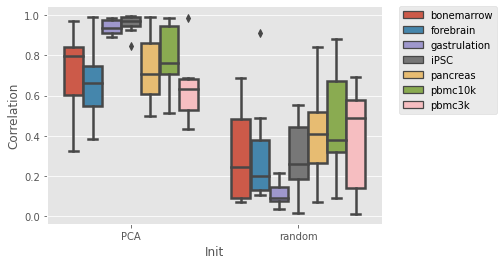

In [5]:
ax = sns.boxplot(x="Init", y="Correlation", hue="dataset",
                 data=d, linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2. Does GPLVM trained with random initialization capture cell type identity?

As a first impression we can visualize UMAP embeddings from all the dimensionality reductions (random GPLVM, initialized GPLM, PCA) and assess qualitatively if we see a separation between cells of the same cell type

In [10]:
# code for UMAP plots ##
plot_umap(forebrain,forebrain_random)

plot_umap(gastrulation, gastrulation_random)

plot_umap(bonemarrow,bonemarrow_random)


plot_umap(pbmc10k,pbmc10k_random)

plot_umap(pancreas,pancreas_random)

plot_umap(pbmc3k,pbmc3k_random)

AnnData object with n_obs × n_vars = 3012 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'likelihood_state_dict', 'model_state_dict', 'pca', 'PCA', 'umap', 'gplvm_PCA', 'leiden'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_ref.spca', 'X_ref.umap', 'X_umap', 'X_umap_pca', 'X_umap_gplvm_random', 'X_umap_gplvm_PC'
    varm: 'PCs'
    obsp: 'PCA_distances', 'PCA_connectivities', 'gplvm_PCA_distances', 'gplvm_PCA_connectivities'

In [12]:
# save everything once so don't have to rerun every time
gastrulation.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/gastrulation_unscaled.h5ad')
forebrain.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/forebrain_unscaled.h5ad')
bonemarrow.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/bonemarrow_unscaled.h5ad')
iPSC.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/iPSC_unscaled.h5ad')
pancreas.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/pancreas_unscaled.h5ad')
pbmc10k.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/pbmc10k_unscaled.h5ad')
pbmc3k.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/Unscaled/pbmc3k_unscaled.h5ad')

In [15]:
forebrain.obs['celltype']=forebrain.obs['Clusters']
pancreas.obs['celltype']=pancreas.obs['clusters']
bonemarrow.obs['celltype']=bonemarrow.obs['clusters']
pancreas.obs['celltype']=pancreas.obs['clusters']
pbmc10k.obs['celltype']=pbmc10k.obs['predicted.celltype.l2']
pbmc3k.obs['celltype']=pbmc3k.obs['predicted.celltype.l2']

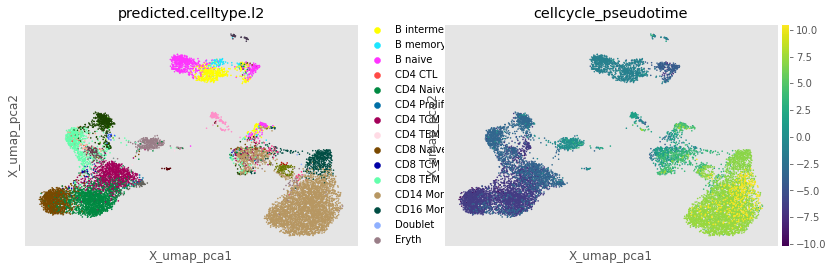

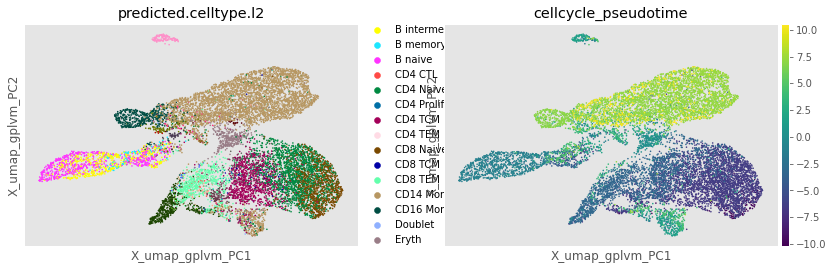

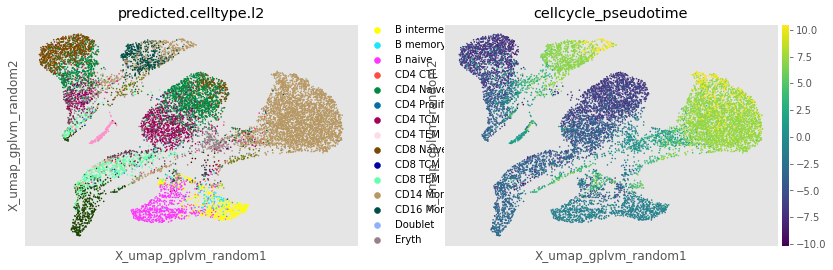

In [16]:
sc.pl.embedding(pbmc10k, "X_umap_pca", color=[ 'predicted.celltype.l2', 'cellcycle_pseudotime'])

sc.pl.embedding(pbmc10k, "X_umap_gplvm_PC", color=[ 'predicted.celltype.l2','cellcycle_pseudotime'])

sc.pl.embedding(pbmc10k, "X_umap_gplvm_random", color=[ 'predicted.celltype.l2','cellcycle_pseudotime'])

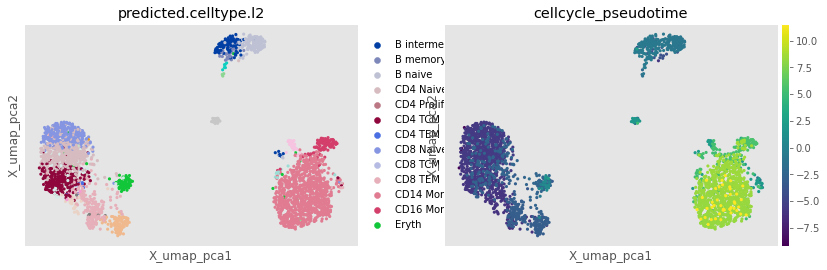

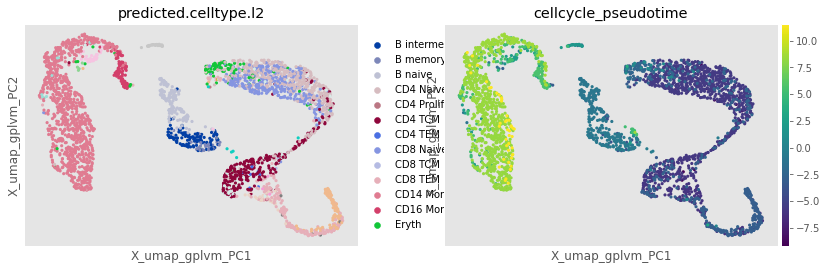

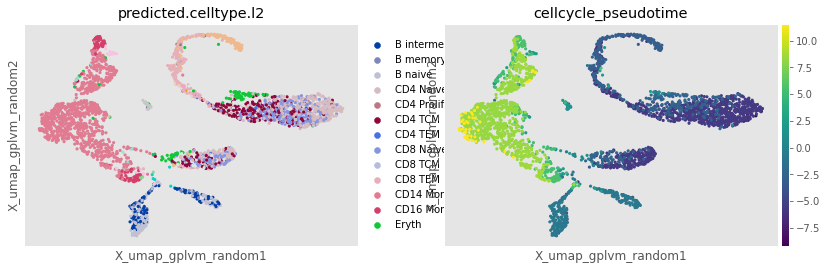

In [17]:
sc.pl.embedding(pbmc3k, "X_umap_pca", color=[ 'predicted.celltype.l2', 'cellcycle_pseudotime'])

sc.pl.embedding(pbmc3k, "X_umap_gplvm_PC", color=[ 'predicted.celltype.l2','cellcycle_pseudotime'])

sc.pl.embedding(pbmc3k, "X_umap_gplvm_random", color=[ 'predicted.celltype.l2','cellcycle_pseudotime'])

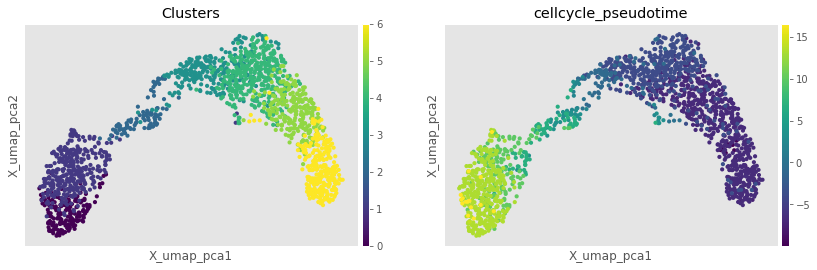

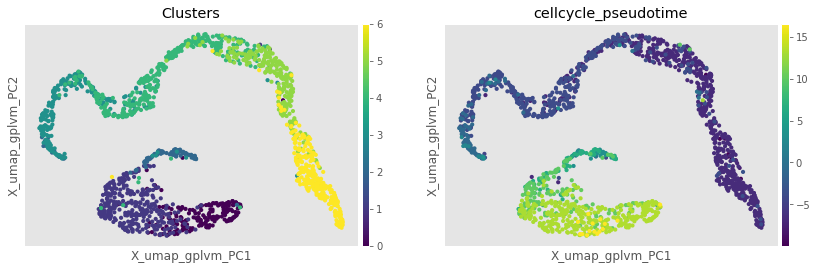

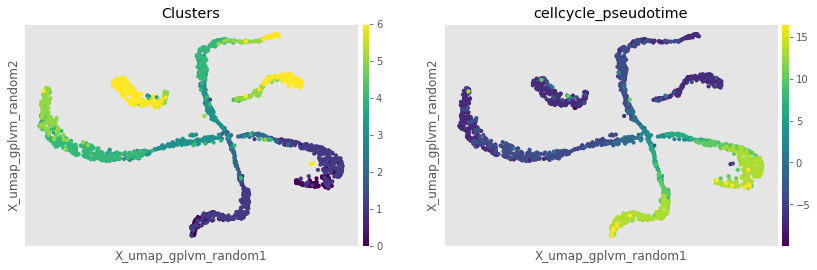

In [19]:
sc.pl.embedding(forebrain, "X_umap_pca", color=[ 'Clusters',"cellcycle_pseudotime"])

sc.pl.embedding(forebrain, "X_umap_gplvm_PC", color=[ 'Clusters', "cellcycle_pseudotime"])

sc.pl.embedding(forebrain, "X_umap_gplvm_random", color=['Clusters',"cellcycle_pseudotime"]) #PCA

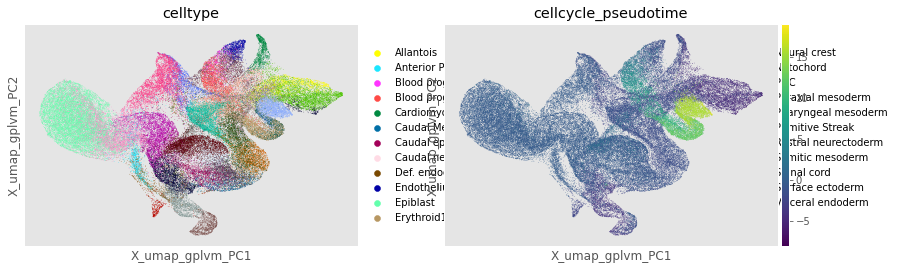

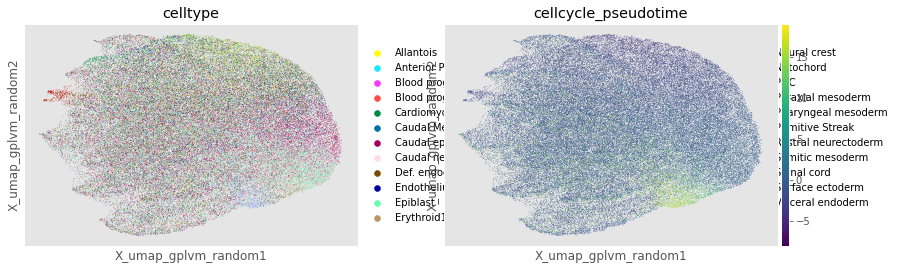

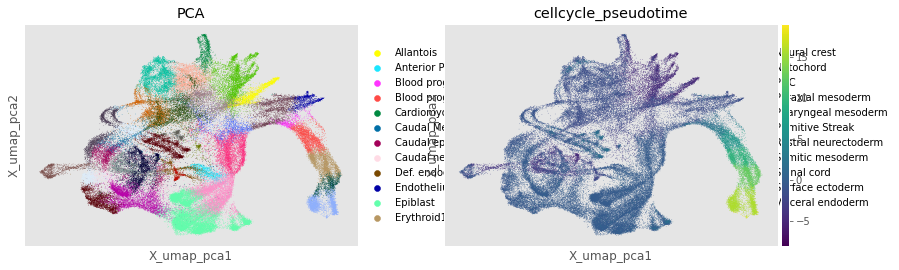

In [25]:
sc.pl.embedding(gastrulation, "X_umap_gplvm_PC", color=[ 'celltype', 'cellcycle_pseudotime'])#, title="PCA_Init")

sc.pl.embedding(gastrulation, "X_umap_gplvm_random", color=[ 'celltype','cellcycle_pseudotime' ])

sc.pl.embedding(gastrulation, "X_umap_pca", color=[ 'celltype' ,'cellcycle_pseudotime'], title="PCA")